### Feature selection in Regression using Correlation

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./CarPricesData.csv')
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [3]:
data.isnull().mean()*100

Price        0.000000
Age          0.139276
KM           0.000000
FuelType     0.278552
HP           0.000000
MetColor     0.000000
Automatic    0.000000
CC           0.139276
Doors        0.000000
Weight       0.139276
dtype: float64

In [4]:
data.dropna(inplace=True)

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
le = LabelEncoder()

In [8]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [9]:
data.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
841,8800,68.0,66550,2,86,0,0,1332.0,3,1010.0
455,9850,53.0,72000,2,97,1,0,1400.0,3,1025.0
645,8600,68.0,117955,2,110,1,1,1600.0,4,1065.0
1161,7950,77.0,98000,2,110,1,0,1600.0,5,1065.0
704,8450,65.0,93408,2,86,0,0,1300.0,3,1015.0
801,9995,61.0,73894,2,110,1,0,1600.0,3,1065.0
1291,7950,78.0,72000,2,110,0,0,1600.0,3,1055.0
334,12400,34.0,32431,2,97,1,0,1400.0,5,1060.0
837,9750,67.0,67110,2,86,1,0,1300.0,5,1035.0
399,10750,54.0,115558,2,110,1,0,1600.0,4,1035.0


#### Selecting the features and targets

In [10]:
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

#### Splitting the data into training and testing sets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47, shuffle=True)

### Checking model scores without feature selection

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)

In [20]:
model.score(x_train, y_train)

0.8589933311181945

In [21]:
model.score(x_test, y_test)

0.8767780339882709

#### Defining feature selection with all features included

In [22]:
fs = SelectKBest(score_func=f_regression, k='all')

#### Fitting the fs

In [23]:
fs.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x0000029C27986F70>)

#### Checking the scores for the features

In [24]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3942.492414
Feature 1: 574.339910
Feature 2: 0.384945
Feature 3: 81.868647
Feature 4: 16.244444
Feature 5: 1.071767
Feature 6: 27.732194
Feature 7: 49.768436
Feature 8: 499.047196


#### Plotting the scores in a bar graph

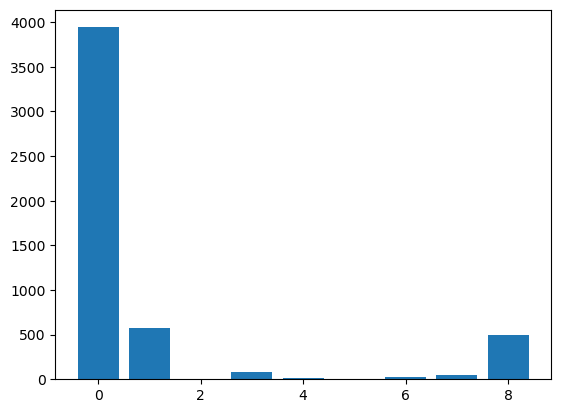

In [26]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Selecting k = 4

In [27]:
fs = SelectKBest(score_func=f_regression, k=4)

#### Transform the train and test data

In [28]:
fs.fit(x_train, y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x0000029C27986F70>)

In [29]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [37]:
x_train_fs.shape

(1140, 4)

In [30]:
x_test_fs.shape

(285, 4)

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train_fs, y_train)

LinearRegression()

In [33]:
y_pred_fs = model.predict(x_test_fs)

In [34]:
model.score(x_train_fs, y_train)

0.8559458124076056

In [35]:
model.score(x_test_fs, y_test)

0.8704453237957606

### Selecting only the top feature

In [36]:
fs = SelectKBest(score_func=f_regression, k=1)

#### Fitting the fs

In [38]:
fs.fit(x_train, y_train)

SelectKBest(k=1, score_func=<function f_regression at 0x0000029C27986F70>)

#### Transforming the training and testing data

In [39]:
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [40]:
model.fit(x_train_fs, y_train)

LinearRegression()

In [41]:
model.score(x_train_fs, y_train)

0.77600596414153

In [42]:
model.score(x_test_fs, y_test)

0.744954467078992